<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Funciones y bases de datos**

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-11 16:50:03--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 64.233.189.102, 64.233.189.138, 64.233.189.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-1o-docs.googleusercontent.com/docs/securesc/tj1kpthvhmi66i2br4h5ir2pp6416kj3/ovmmbj68jf9nese08np56l7g3gstn34f/1589215800000/11146100322577758036/02587580645686402681Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-11 16:50:04--  https://doc-10-1o-docs.googleusercontent.com/docs/securesc/tj1kpthvhmi66i2br4h5ir2pp6416kj3/ovmmbj68jf9nese08np56l7g3gstn34f/1589215800000/11146100322577758036/02587580645686402681Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-10-1o-docs.googleusercontent.com (doc-10-1o-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to

**Añadir Carpeta de funciones y bases de datos**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin

## **Sin ruido**
**Validacion de la metodologia**

**Happy**

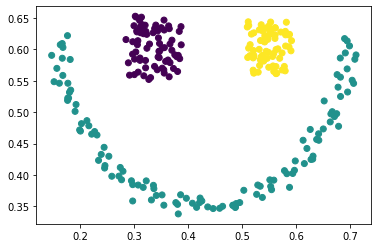

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Crear conjunto de train y test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)

# **Punto Fijo**

**Reduccion con Kmeans**

el tiempo requerido fue:1.5095760822296143sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


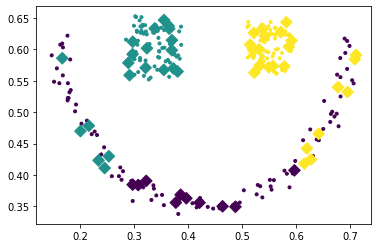

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='Kmeans')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

****Reduccion con Spectral Clustering****

el tiempo requerido fue:1.8694777488708496sg
Ari: 1.0 y accuracy: 1.0


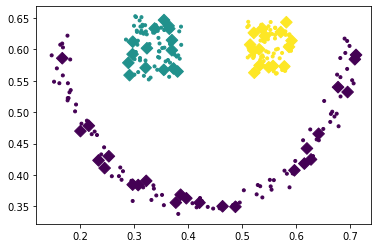

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:1.0721418857574463sg
Ari: 1.0 y accuracy: 1.0


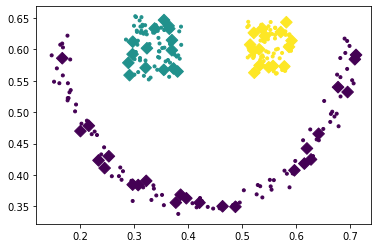

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',gamma_=500,n_clusters=3)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:1.0941736698150635sg
Ari: 1.0 y accuracy: 1.0


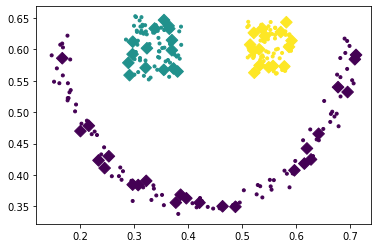

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.003,optimization='Adam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:1.091156005859375sg
Ari: 1.0 y accuracy: 1.0


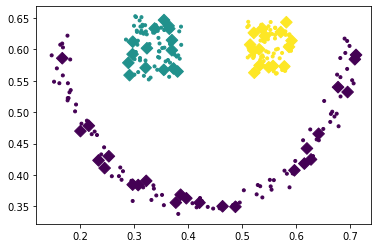

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.002,optimization='Nadam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Kmeans**

el tiempo requerido fue:0.04242753982543945sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


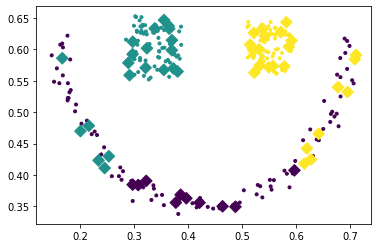

In [0]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))

**Spectral Clustering**

el tiempo requerido fue:0.059571266174316406sg
Ari: 1.0 y accuracy: 1.0


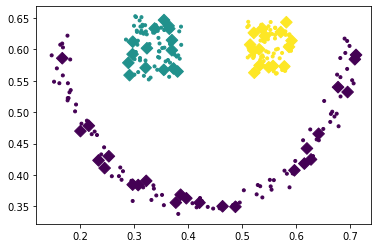

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

## **Con ruido**


**happy**

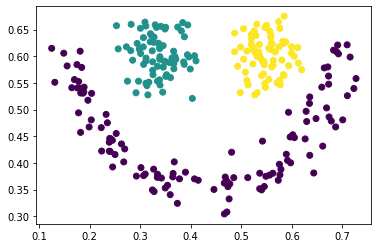

In [0]:
# Set a target SNR
target_snr_db =30
# Calculate signal power and convert to dB 
avg_happy = np.mean(happy)
avg_db = 10 * np.log10(avg_happy)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),happy.shape)
noisy_happy=happy+noise_volts
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_happy, labels_happy, test_size=0.2, stratify=labels_happy)

**FP**

/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:3.5322482585906982sg
Ari: 0.6310246340592645 y accuracy: 0.8703703703703703


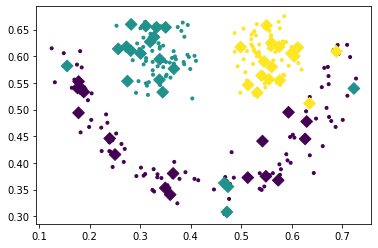

In [0]:
t = time.time()
p = PRI(lambda_=3, n_clusters=3, nn=5, sigma_initial=2,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:1.0158705711364746sg
Ari: 0.4867636947054779 y accuracy: 0.7592592592592593


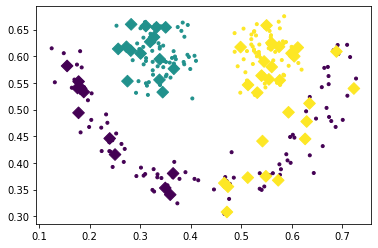

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',n_clusters=3,gamma_=500,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.061058998107910156sg
Ari: 0.5793650793650794 y accuracy: 0.8333333333333334


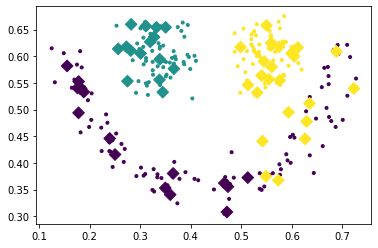

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**moons**

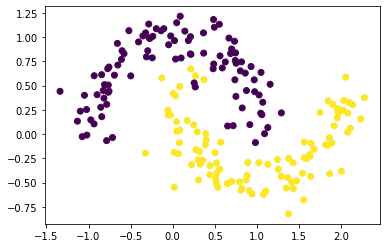

In [0]:

moons,labels_moons = datasets.make_moons(n_samples=200)
# Set a target SNR
target_snr_db =12
# Calculate signal power and convert to dB 
avg_moons = np.mean(moons)
avg_db = 10 * np.log10(avg_moons)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),moons.shape)
noisy_moons=moons+noise_volts
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_moons, labels_moons, test_size=0.2, stratify=labels_moons)

**FP**

el tiempo requerido fue:0.8858356475830078sg
Ari: 0.47712933753943215 y accuracy: 0.85


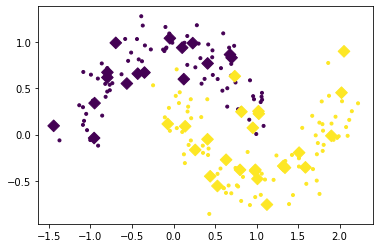

In [0]:
t = time.time()
p = PRI(lambda_=2, n_clusters=2, nn=3, sigma_initial=15,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.6042680740356445sg
Ari: 0.5517241379310345 y accuracy: 0.875


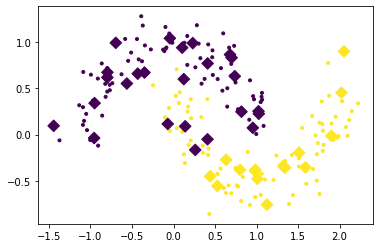

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=40,learning_rate=0.03,reduction_='SC',n_clusters=2)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.1457967758178711sg
Ari: 0.10931095061487414 y accuracy: 0.675


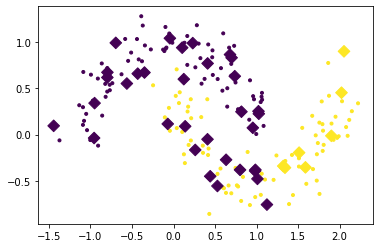

In [0]:
t = time.time()
p = SC(n_clusters_=2, gamma_=100, n_neighbors_=1, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**Happy**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())], 
        [('rep', PRI())], 
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[100,200,500,1000],'rep__n_neighbors_':[5,10,15],'rep__nn_':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
             {'rep__lambda_':[2,3],'rep__sigma_initial':[30,35,40,45],'rep__learning_rate':[0.001,0.003],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000],'rep__optimization':['Adam','Nadam',None]}]

In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[2,3],'rep__sigma_initial':[35],'rep__learning_rate':[0.01,0.03],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam'],'rep__batch_size':[64]}]

In [6]:
n=[5,15,30]
moons,labels_moons = datasets.make_moons(n_samples=200)
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_happy = np.mean(happy)
  avg_db = 10 * np.log10(avg_happy)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),happy.shape)
  noisy_happy=happy+noise_

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_happy,labels_happy,test_size=0.2, stratify=labels_happy)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   11.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 48.148148148148145
ari: 3.3966287571080382
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   13.1s finished


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 100, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 44.44444444444444
ari: 0.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 38.88888888888889
ari: -2.0025661022918824
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.004875195007801974
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 48.148148148148145
ari: 3.064228030893858
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 48.148148148148145
ari: 4.139040561622466
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 46.2962962962963
ari: 1.4997508719481825
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 37.03703703703704
ari: -1.134605466735429
it 1/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.5s finished


it 1/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 2/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s finished


it 2/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 46.2962962962963
ari: 1.1157407407407445
it 3/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.4s finished


it 3/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 4/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.8s finished


it 4/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 5/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.5s finished


it 5/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 6/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.9s finished


it 6/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 7/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   20.5s finished


it 7/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 8/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   23.3s finished


it 8/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0
it 9/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.4s finished


it 9/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.5347177157689837
it 10/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.4s finished


it 10/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 48.148148148148145
ari: 2.5959394437272567
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 50.0
ari: 6.090119690213566
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 61.111111111111114
ari: 22.973375424385015
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 59.25925925925925
ari: 17.291083447495385
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 46.2962962962963
ari: 0.6397156819191511
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 53.70370370370371
ari: 6.15975246390099
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 59.25925925925925
ari: 12.530851348538462
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 48.148148148148145
ari: 3.001235802977701
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 53.70370370370371
ari: 7.02299929593992
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 46.2962962962963
ari: 0.5943536404160475
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 55.55555555555556
ari: 8.965883602880414
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 59.25925925925925
ari: 13.194643985977816
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 51.85185185185185
ari: 8.699924851147463
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 57.407407407407405
ari: 14.501562056234024
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 61.111111111111114
ari: 15.1364691365279
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 55.55555555555556
ari: 11.594541000816518
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 55.55555555555556
ari: 8.57779863881718
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 57.407407407407405
ari: 11.728611500701264
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 51.85185185185185
ari: 4.965952005709358
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 66.66666666666666
ari: 22.577197149643702
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 61.111111111111114
ari: 15.729875616052572
it 1/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.1s finished


it 1/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 50.0
ari: 10.754517718845342
it 2/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.1s finished


it 2/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 57.407407407407405
ari: 16.091649208411784
it 3/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.1s finished


it 3/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 51.85185185185185
ari: 5.867029779172343
it 4/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.2s finished


it 4/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 53.70370370370371
ari: 6.67825079640892
it 5/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.2s finished


it 5/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 50.0
ari: 6.370283708686747
it 6/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 6/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 62.96296296296296
ari: 16.86988379414964
it 7/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.2s finished


it 7/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 64.81481481481481
ari: 25.23314838862
it 8/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.2s finished


it 8/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 57.407407407407405
ari: 9.632418069087688
it 9/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.2s finished


it 9/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 50.0
ari: 3.3349073308936363
it 10/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.2s finished


it 10/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 48.148148148148145
ari: 7.580866083658202
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 96.29629629629629
ari: 88.39026700609793
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 88.88888888888889
ari: 67.31027085009386
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 88.88888888888889
ari: 68.87346502936464
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 98.14814814814815
ari: 94.05619171290284
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.18518518518519
ari: 58.55065568408219
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 92.5925925925926
ari: 77.9691211401425
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 96.29629629629629
ari: 88.39026700609793
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 88.88888888888889
ari: 67.31027085009386
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.03703703703704
ari: 64.857024450891
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 90.74074074074075
ari: 73.24821852731591
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.77777777777779
ari: 44.09906866057526
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 38.66953538407862
it 3/10


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 75.92592592592592
ari: 41.462131837307155
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 39.22194803309624
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 75.92592592592592
ari: 41.09388710149167
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.77777777777779
ari: 44.64914339356959
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 77.77777777777779
ari: 44.64914339356959
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 79.62962962962963
ari: 47.49690429860251
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.22222222222221
ari: 36.64241164241164


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.22222222222221
ari: 37.377521613832855
it 1/10


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 1/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 85.18518518518519
ari: 59.085510688836095
it 2/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 2/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 55.55555555555556
ari: 33.39717186557179
it 3/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 3/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 92.5925925925926
ari: 77.46290404115494
it 4/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 4/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 83.33333333333334
ari: 54.36460807600949
it 5/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.1s finished


it 5/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 83.33333333333334
ari: 54.27228370819945
it 6/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 6/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 77.77777777777779
ari: 50.415800415800405
it 7/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 7/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 90.74074074074075
ari: 72.21990589076181
it 8/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 8/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 55.55555555555556
ari: 30.677764565992867
it 9/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


it 9/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 79.62962962962963
ari: 49.31354142220137
it 10/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.1s finished


it 10/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.01, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 44.44444444444444
ari: 0.0


**Moons**


In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[2,3],'rep__sigma_initial':[35],'rep__learning_rate':[0.01,0.03],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam'],'rep__batch_size':[64]}]

In [8]:
n=[5,15,30]
moons,labels_moons = datasets.make_moons(n_samples=200)
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_moons = np.mean(moons)
  avg_db = 10 * np.log10(avg_moons)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),moons.shape)
  noisy_moons=moons+noise_

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_moons))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   21.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 80.0
ari: 34.384858044164034
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   18.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.0
ari: 47.67166535122336
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   21.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 77.5
ari: 28.45683476888684
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   17.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 75.0
ari: 23.04656669297554
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 82.5
ari: 40.73416222616933
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   17.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 77.5
ari: 28.419182948490228
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   16.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.0
ari: 47.67166535122336
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   17.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 80.0
ari: 34.333070244672456
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   19.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.0
ari: 47.67166535122336
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   18.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 10/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 90.0
ari: 63.06235201262825
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 70.0
ari: 13.8121546961326
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.384858044164034
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.333070244672456
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.53201970443349
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.419182948490228
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.384858044164034
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.04656669297554
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.107255520504726
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.419182948490228
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 70.0
ari: 13.8121546961326
it 1/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   29.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   52.5s finished


it 1/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 87.5
ari: 55.10163805012828
it 2/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   27.6s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   48.5s finished


it 2/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 82.5
ari: 40.73416222616933
it 3/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   29.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   53.3s finished


it 3/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 80.0
ari: 34.333070244672456
it 4/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.2s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   48.4s finished


it 4/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 85.0
ari: 47.67166535122336
it 5/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   30.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   49.2s finished


it 5/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 80.0
ari: 34.315789473684205
it 6/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.2s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   54.9s finished


it 6/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 77.5
ari: 28.419182948490228
it 7/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   29.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   51.8s finished


it 7/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 82.5
ari: 40.76533631402459
it 8/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   30.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   51.0s finished


it 8/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 80.0
ari: 34.333070244672456
it 9/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   34.5s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   56.3s finished


it 9/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 77.5
ari: 28.419182948490228
it 10/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   34.5s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  1.0min finished


it 10/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 65.0
ari: 6.629834254143652
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   13.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 65.0
ari: 7.794232268121577
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   14.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 97.5
ari: 89.99407933688573
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   12.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   15.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   14.5s finished


it 5/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 97.5
ari: 89.99407933688573
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   14.7s finished


it 6/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   12.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 87.5
ari: 55.10163805012828
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   12.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 85.0
ari: 47.781569965870304
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   12.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   11.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 82.5
ari: 40.92071611253197
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 67.5
ari: 9.946714031971581
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.02631578947368
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.53201970443349
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 67.5
ari: 10.08866995073891
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 65.0
ari: 6.605263157894732
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.156700217090982
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.199750147938715
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 82.5
ari: 40.73416222616933
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 67.5
ari: 9.994082451180217
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 72.5
ari: 18.156700217090982
it 1/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.1s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   33.5s finished


it 1/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 87.5
ari: 55.10163805012828
it 2/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   30.5s finished


it 2/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 75.0
ari: 23.04656669297554
it 3/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.7s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   34.1s finished


it 3/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 85.0
ari: 47.67166535122336
it 4/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.1s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   29.3s finished


it 4/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 82.5
ari: 40.76533631402459
it 5/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.3s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   29.4s finished


it 5/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 70.0
ari: 13.78947368421052
it 6/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   17.3s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   31.8s finished


it 6/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 72.5
ari: 18.414322250639387
it 7/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   29.9s finished


it 7/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 87.5
ari: 55.10163805012828
it 8/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   31.4s finished


it 8/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 77.5
ari: 28.419182948490228
it 9/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   29.2s finished


it 9/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 80.0
ari: 34.333070244672456
it 10/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   30.0s finished


it 10/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 67.5
ari: 9.946714031971581
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    9.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   12.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   11.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   13.7s finished


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   11.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   12.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    9.3s remaining:    2.3s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   11.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   16.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   11.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   11.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


it 10/10
{'rep__gamma_': 100, 'rep__n_clusters_': 2, 'rep__n_neighbors_': 5, 'rep__nn_': 5}
acc: 100.0
ari: 100.0
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 57.49999999999999
ari: -0.3157686994276681
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 82.5
ari: 40.73416222616933
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 67.5
ari: 9.994082451180217
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 87.5
ari: 55.10163805012828
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.419182948490228
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.384858044164034
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.04656669297554
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 77.5
ari: 28.53201970443349
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 80.0
ari: 34.333070244672456
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 2, 'rep__nn': 5}
acc: 75.0
ari: 23.208191126279868
it 1/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   28.9s finished


it 1/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 72.5
ari: 18.156700217090982
it 2/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   25.8s finished


it 2/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 77.5
ari: 28.419182948490228
it 3/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   28.9s finished


it 3/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 75.0
ari: 23.04656669297554
it 4/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   31.5s finished


it 4/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 80.0
ari: 34.59119496855346
it 5/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.3s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   24.3s finished


it 5/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 90.0
ari: 63.09148264984227
it 6/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   28.7s finished


it 6/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 75.0
ari: 23.529411764705884
it 7/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   29.3s finished


it 7/10
{'rep__batch_size': 64, 'rep__gamma_': 1, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 80.0
ari: 34.470989761092156
it 8/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.2s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   26.8s finished


it 8/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 72.5
ari: 18.156700217090982
it 9/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   30.6s finished


it 9/10
{'rep__batch_size': 64, 'rep__gamma_': 100, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 75.0
ari: 23.02631578947368
it 10/10
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   29.4s finished


it 10/10
{'rep__batch_size': 64, 'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.03, 'rep__n_clusters': 2, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 82.5
ari: 40.82758620689655


In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

In [0]:
y7